In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('DOGE-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [33]:
data.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


In [35]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [38]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [40]:
data.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [42]:
data.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [44]:
data[data.isnull().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Drop the only row with nulls to prevent errors
data = data.dropna()

In [48]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2021')

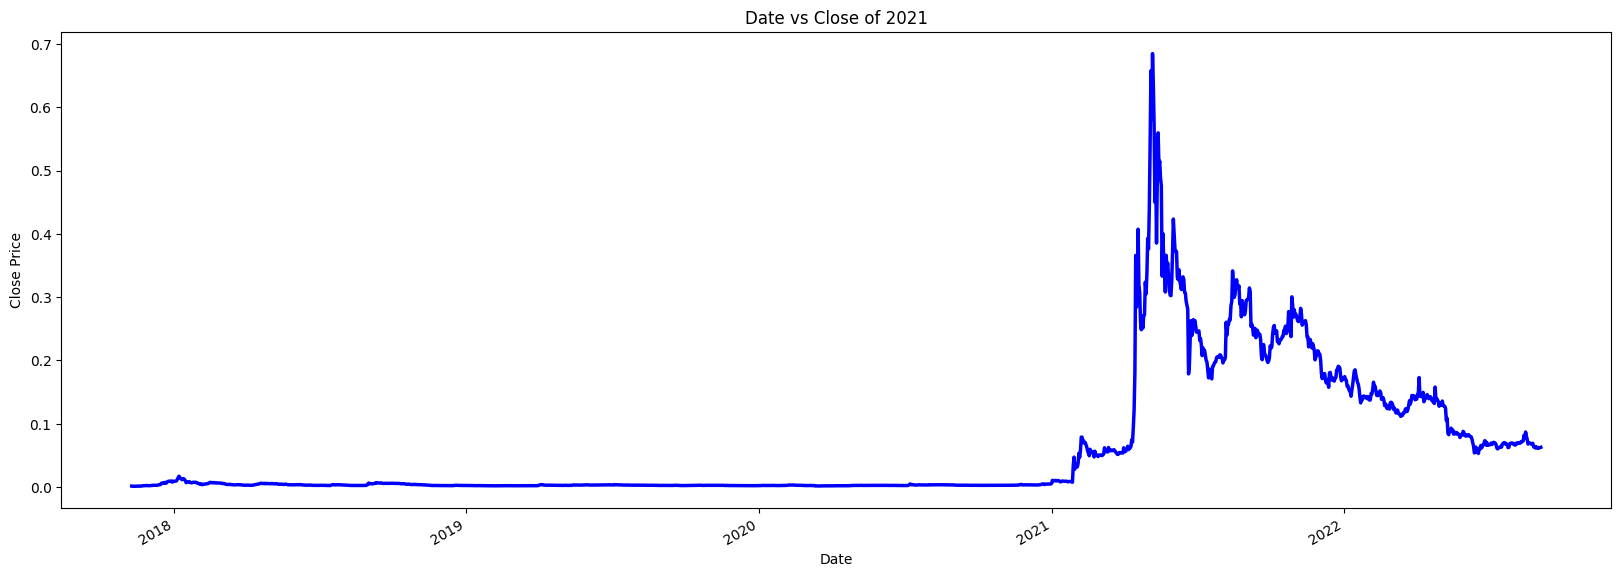

In [53]:
plt.figure(figsize=(20,7))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("Date vs Close of 2021")

In [56]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]  # Weighted daily price range (volatility × volume)
data["y"] = data["High"] / data["Volume"]                   # High price normalized by volume
data["z"] = data["Low"] / data["Volume"]                    # Low price normalized by volume
data["a"] = data["High"] / data["Low"]                     # Intraday volatility ratio (High/Low)
data["b"] = (data["High"] / data["Low"]) * data["Volume"]  # Volume-weighted intraday volatility
abs(data.corr()["Close"].sort_values(ascending=False))      # Absolute correlation of all features with Close, sorted

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

In [58]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [59]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)

(11, 5) (19, 5)


In [60]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 20.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  47.663
Date:                Mon, 17 Nov 2025   AIC                            -79.326
Time:                        19:46:51   BIC                            -76.905
Sample:                    08-05-2022   HQIC                           -81.981
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      7.491e-10   1.84e-10      4.077      0.000    3.89e-10    1.11e-09
gap          1.13e-08   2.45e-09      4.615      0.000     6.5e-09    1.61e-08
a             -0.0073   5.05e-15  -1.44e+12      0.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
start = 11
end = 29
predictions = results.predict(
    start=start,
    end=end,
    exog=test.drop("Close", axis=1))
predictions

2022-08-16    0.097293
2022-08-17    0.083717
2022-08-18    0.075957
2022-08-19    0.069575
2022-08-20    0.071583
2022-08-21    0.072099
2022-08-22    0.071244
2022-08-23    0.072458
2022-08-24    0.072406
2022-08-25    0.071893
2022-08-26    0.068140
2022-08-27    0.071804
2022-08-28    0.071866
2022-08-29    0.071522
2022-08-30    0.070720
2022-08-31    0.071736
2022-09-01    0.071452
2022-09-02    0.072203
2022-09-03    0.072785
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

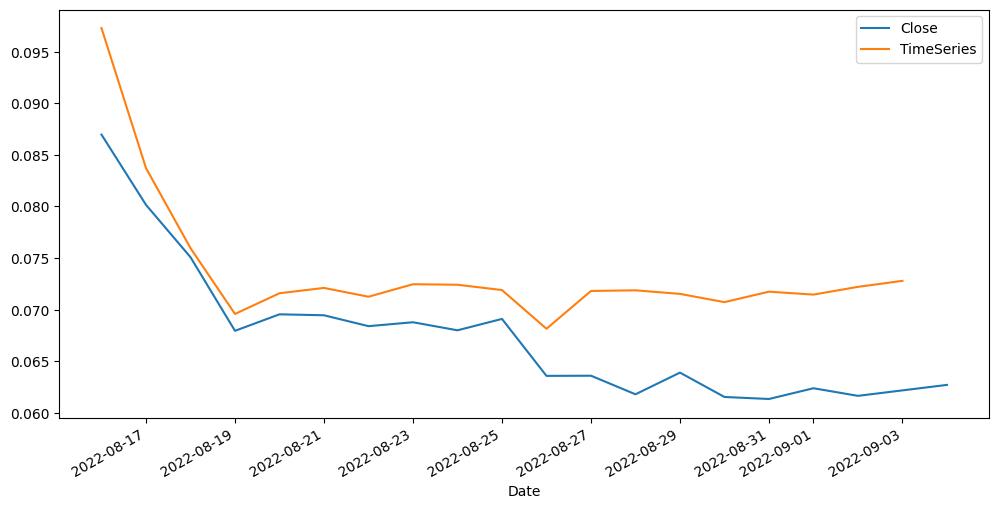

In [64]:
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)